# Scope analysis

## States Selection

In this extract we will scrap wikipedia to select the top 5 most populated states in USA so that we can base our project on those states.

In [17]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

color_palette = ['#F89522', '#26AA91', '#4CB850', '#DF1F27', '#2D3E50']

In [18]:
# Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population"

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

# after checking the web, we can see we need the wikitable class to call the table
table = soup.find('table', {'class': 'wikitable'})

# lets make a stringIO object to read the html
html_string = str(table)
html_file = StringIO(html_string)

table_df = pd.read_html(html_file)[0]

table_df

State or territory Census population[8][a]                \
              State or territory     July 1, 2023 (est.) April 1, 2020   
0                            NaN                     NaN           NaN   
1                     California              38965193.0    39538223.0   
2                          Texas              30503301.0    29145505.0   
3                        Florida              22610726.0    21538187.0   
4                       New York              19571216.0    20201249.0   
..                           ...                     ...           ...   
56  Northern Mariana Islands[13]                     NaN       47329.0   
57      Contiguous United States             332746351.0   329260619.0   
58                 The 50 states             334235923.0   330759736.0   
59        The 50 states and D.C.             334914895.0   331449281.0   
60      Total US and territories                     NaN   335073176.0   

   Change, 2010–2020[8][a]           House seats[b]          \
                         %      Abs.          Seats       %   
0                      NaN       NaN            NaN     NaN   
1                    6.13%   2284267             52  11.95%   
2                   15.91%   3999944             38   8.74%   
3                   14.56%   2736877             28   6.44%   
4                    4.25%    823147             26   5.98%   
..                     ...       ...            ...     ...   
56                 −12.16%    −6,554             1*       —   
57                   7.36%  22585613      432 (+1*)  99.31%   
58                   7.34%  22615921            435    100%   
59                   7.35%  22703743      435 (+1*)    100%   
60                   7.10%  22226684      435 (+6*)    100%   

   Pop. per elec. vote, 2020[c] Pop. per seat (2020)[a] % US (2020)  \
   Pop. per elec. vote, 2020[c] Pop. per seat (2020)[a] % US (2020)   
0                           NaN                     NaN         NaN   
1                        732189                  760350     11.800%   
2                        728638                  766987      8.698%   
3                        717940                  769221      6.428%   
4                        721473                  776971      6.029%   
..                          ...                     ...         ...   
56                            —                       —      0.014%   
57                       627163                  757745     98.265%   
58                       621729                  755796     98.713%   
59                       619531                       —     98.918%   
60                            —                       —        100%   

   % EC (2020)  
   % EC (2020)  
0          NaN  
1       10.04%  
2        7.43%  
3        5.58%  
4        5.20%  
..         ...  
56           —  
57      98.70%  
58      99.44%  
59        100%  
60           —  

[61 rows x 11 columns]

In [19]:
# Selecting table columns
table_df = table_df[1:57][['State or territory','Census population[8][a]']]

# managing multilevel columns
table_df.columns.names = ['1','2']

table_df = table_df.droplevel('1',axis=1)

table_df.drop(columns='July 1, 2023 (est.)',inplace=True)

table_df.head()

2,State or territory,"April 1, 2020"
1,California,39538223.0
2,Texas,29145505.0
3,Florida,21538187.0
4,New York,20201249.0
5,Pennsylvania,13002700.0


In [20]:
# renaming columns and sorting
table_df.columns = ['State','2020 Population']

table_df.sort_values('2020 Population',ascending=False).head()

,State,2020 Population
1,California,39538223.0
2,Texas,29145505.0
3,Florida,21538187.0
4,New York,20201249.0
5,Pennsylvania,13002700.0


In [21]:
# lets check the % covered to see if we have a representative sample
total_population = table_df['2020 Population'].sum()

table_df['% population'] = round(table_df['2020 Population']/total_population * 100,1)

table_df.head(10)

,State,2020 Population,% population
1,California,39538223.0,11.8
2,Texas,29145505.0,8.7
3,Florida,21538187.0,6.4
4,New York,20201249.0,6.0
5,Pennsylvania,13002700.0,3.9
6,Illinois,12812508.0,3.8
7,Ohio,11799448.0,3.5
8,Georgia,10711908.0,3.2
9,North Carolina,10439388.0,3.1
10,Michigan,10077331.0,3.0


In [22]:
# selecting top 5
selected = table_df.loc[:5]
selected

,State,2020 Population,% population
1,California,39538223.0,11.8
2,Texas,29145505.0,8.7
3,Florida,21538187.0,6.4
4,New York,20201249.0,6.0
5,Pennsylvania,13002700.0,3.9


In [23]:
per = selected['% population'].sum()
tots = selected['2020 Population'].sum()

print(f'Total population covered with the selected states: {tots:,.0f}\n Percentage of USA population: {per}%')

Total population covered with the selected states: 123,425,864
 Percentage of USA population: 36.8%


In [24]:
selected_table = table_df[:10]
selected_table['% Ac. Population'] = selected_table['% population'].cumsum()
selected_table

C:\Users\pedro\AppData\Local\Temp\ipykernel_26060\2044763792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_table['% Ac. Population'] = selected_table['% population'].cumsum()


,State,2020 Population,% population,% Ac. Population
1,California,39538223.0,11.8,11.8
2,Texas,29145505.0,8.7,20.5
3,Florida,21538187.0,6.4,26.9
4,New York,20201249.0,6.0,32.9
5,Pennsylvania,13002700.0,3.9,36.8
6,Illinois,12812508.0,3.8,40.6
7,Ohio,11799448.0,3.5,44.1
8,Georgia,10711908.0,3.2,47.3
9,North Carolina,10439388.0,3.1,50.4
10,Michigan,10077331.0,3.0,53.4


C:\Users\pedro\AppData\Local\Temp\ipykernel_26060\3779946559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_table,x='State', y='2020 Population', ax=ax1, label='Total Population',palette=color_palette)
C:\Users\pedro\AppData\Local\Temp\ipykernel_26060\3779946559.py:5: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=selected_table,x='State', y='2020 Population', ax=ax1, label='Total Population',palette=color_palette)
C:\Users\pedro\AppData\Local\Temp\ipykernel_26060\3779946559.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


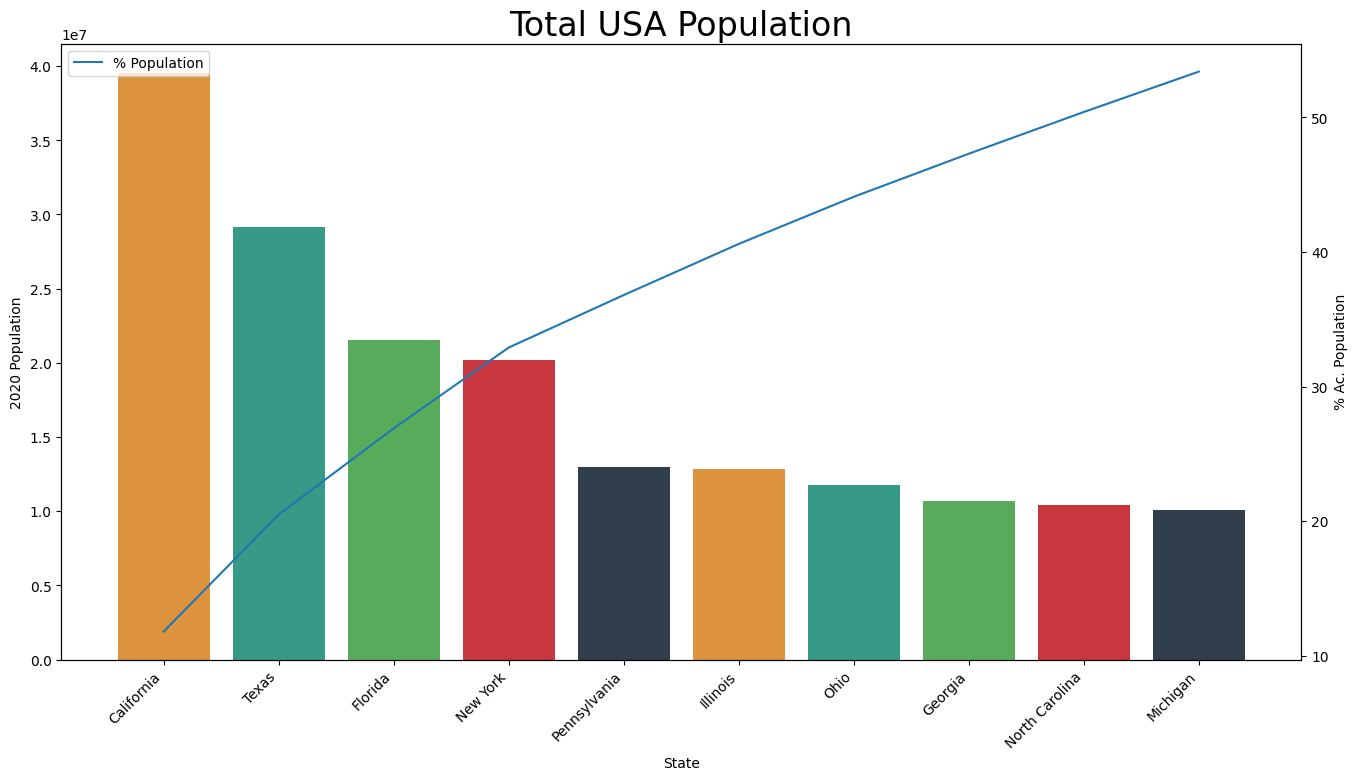

In [38]:
# Crear un objeto de figura y ejes

fig, ax1 = plt.subplots(figsize=(16,8))
# Graficar la línea
sns.barplot(data=selected_table,x='State', y='2020 Population', ax=ax1, label='Total Population',palette=color_palette)

ax2 = ax1.twinx()
# Graficar las barras
sns.lineplot(data=selected_table,x='State', y='% Ac. Population', ax=ax2, label='% Population')


# Añadir leyenda y título
ax1.set_title('Total USA Population', fontsize=24)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

## Type of Business Selection

We downloaded, using google analytics tool, the search patterns of the main type of businesses in our data: Restaurants, Hotels, Pharmacies, Hair saloons, Hardware Stores and Spas. For us to give our customers the best business model possible, we will focuse on understanding such business trends and scope our consulting analysis into the most searched type.

In [26]:
df_analytics = pd.read_excel('Processed Data/Data - Google Analytics Business.xlsx',sheet_name='Data - Google Analytics Busines')

df_analytics

,Keyword Stats 2024-01-30 at 01_49_32,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1 de enero de 2023 - 31 de diciembre de 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Keyword,Currency,Segmentation,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),...,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023
2,NaN,NaN,Todo,1.18196E8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Estados Unidos,1.18196E8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hair salon,EUR,NaN,1220000,0.22,0.22,Baja,4,"1,11","5,03",...,1220000,1220000,1220000,1220000,1220000,1220000,1220000,1000000,1000000,1220000
5,hardware store,EUR,NaN,823000,-0.18,-0.45,Baja,9,"0,55","2,77",...,823000,823000,1000000,1000000,1000000,1000000,823000,673000,550000,550000
6,hotel,EUR,NaN,4.55E7,-0.18,-0.18,Baja,3,"1,53","4,33",...,45500000,45500000,45500000,45500000,55600000,45500000,45500000,37200000,30400000,30400000
7,pharmacy,EUR,NaN,1830000,0,-0.33,Baja,5,"1,07","4,36",...,2240000,1830000,2240000,2240000,2240000,2240000,2240000,1500000,1500000,1500000
8,restaurant,EUR,NaN,6.8E7,-0.18,-0.33,Baja,3,"0,94","3,77",...,68000000,68000000,83100000,83100000,83100000,83100000,68000000,55600000,45500000,45500000
9,spa,EUR,NaN,823000,0.22,0,Baja,5,"0,69","2,49",...,823000,673000,823000,673000,823000,1000000,823000,673000,823000,823000


In [27]:
# so we can see that the stats are from the year 2023, lets clean our table
df_analytics.columns = df_analytics.loc[1]
df_analytics = df_analytics.loc[4:]
df_analytics

1,Keyword,Currency,Segmentation,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),...,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023
4,hair salon,EUR,NaN,1220000,0.22,0.22,Baja,4,"1,11","5,03",...,1220000,1220000,1220000,1220000,1220000,1220000,1220000,1000000,1000000,1220000
5,hardware store,EUR,NaN,823000,-0.18,-0.45,Baja,9,"0,55","2,77",...,823000,823000,1000000,1000000,1000000,1000000,823000,673000,550000,550000
6,hotel,EUR,NaN,4.55E7,-0.18,-0.18,Baja,3,"1,53","4,33",...,45500000,45500000,45500000,45500000,55600000,45500000,45500000,37200000,30400000,30400000
7,pharmacy,EUR,NaN,1830000,0,-0.33,Baja,5,"1,07","4,36",...,2240000,1830000,2240000,2240000,2240000,2240000,2240000,1500000,1500000,1500000
8,restaurant,EUR,NaN,6.8E7,-0.18,-0.33,Baja,3,"0,94","3,77",...,68000000,68000000,83100000,83100000,83100000,83100000,68000000,55600000,45500000,45500000
9,spa,EUR,NaN,823000,0.22,0,Baja,5,"0,69","2,49",...,823000,673000,823000,673000,823000,1000000,823000,673000,823000,823000


In [28]:
df_analytics.columns

Index(['Keyword', 'Currency', 'Segmentation', 'Avg. monthly searches',
       'Three month change', 'YoY change', 'Competition',
       'Competition (indexed value)', 'Top of page bid (low range)',
       'Top of page bid (high range)', 'Ad impression share',
       'Organic average position', 'Organic impression share', 'In Account',
       'Searches: Jan 2023', 'Searches: Feb 2023', 'Searches: Mar 2023',
       'Searches: Apr 2023', 'Searches: May 2023', 'Searches: Jun 2023',
       'Searches: Jul 2023', 'Searches: Aug 2023', 'Searches: Sep 2023',
       'Searches: Oct 2023', 'Searches: Nov 2023', 'Searches: Dec 2023'],
      dtype='object', name=1)

In [29]:
useless_cols = ['Currency','Segmentation','Avg. monthly searches','Three month change','YoY change','Competition','Competition (indexed value)','Top of page bid (low range)', 'Top of page bid (high range)', 'Ad impression share','Organic average position','Organic impression share','In Account']

df_analytics.drop(columns=useless_cols,inplace=True)
df_analytics #we will only keep months in order to see how many searches they have per month

C:\Users\pedro\AppData\Local\Temp\ipykernel_26060\2011815127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analytics.drop(columns=useless_cols,inplace=True)


1,Keyword,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023
4,hair salon,1220000,1220000,1220000,1220000,1220000,1220000,1220000,1220000,1220000,1000000,1000000,1220000
5,hardware store,1000000,823000,823000,823000,1000000,1000000,1000000,1000000,823000,673000,550000,550000
6,hotel,45500000,45500000,45500000,45500000,45500000,45500000,55600000,45500000,45500000,37200000,30400000,30400000
7,pharmacy,2240000,2240000,2240000,1830000,2240000,2240000,2240000,2240000,2240000,1500000,1500000,1500000
8,restaurant,68000000,68000000,68000000,68000000,83100000,83100000,83100000,83100000,68000000,55600000,45500000,45500000
9,spa,1000000,823000,823000,673000,823000,673000,823000,1000000,823000,673000,823000,823000


In [30]:
# lets normalize the dataset

df_melted = pd.melt(df_analytics, id_vars=['Keyword'], var_name='Month', value_name='Value')
df_melted.Month = df_melted.Month.apply(lambda x: x.replace('Searches: ','').replace(' 2023',''))
df_melted

,Keyword,Month,Value
0,hair salon,Jan,1220000
1,hardware store,Jan,1000000
2,hotel,Jan,45500000
3,pharmacy,Jan,2240000
4,restaurant,Jan,68000000
...,...,...,...
67,hardware store,Dec,550000
68,hotel,Dec,30400000
69,pharmacy,Dec,1500000
70,restaurant,Dec,45500000


C:\Users\pedro\AppData\Local\Temp\ipykernel_26060\2909365528.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_melted,x='Month',y='Value',hue='Keyword',palette=color_palette)


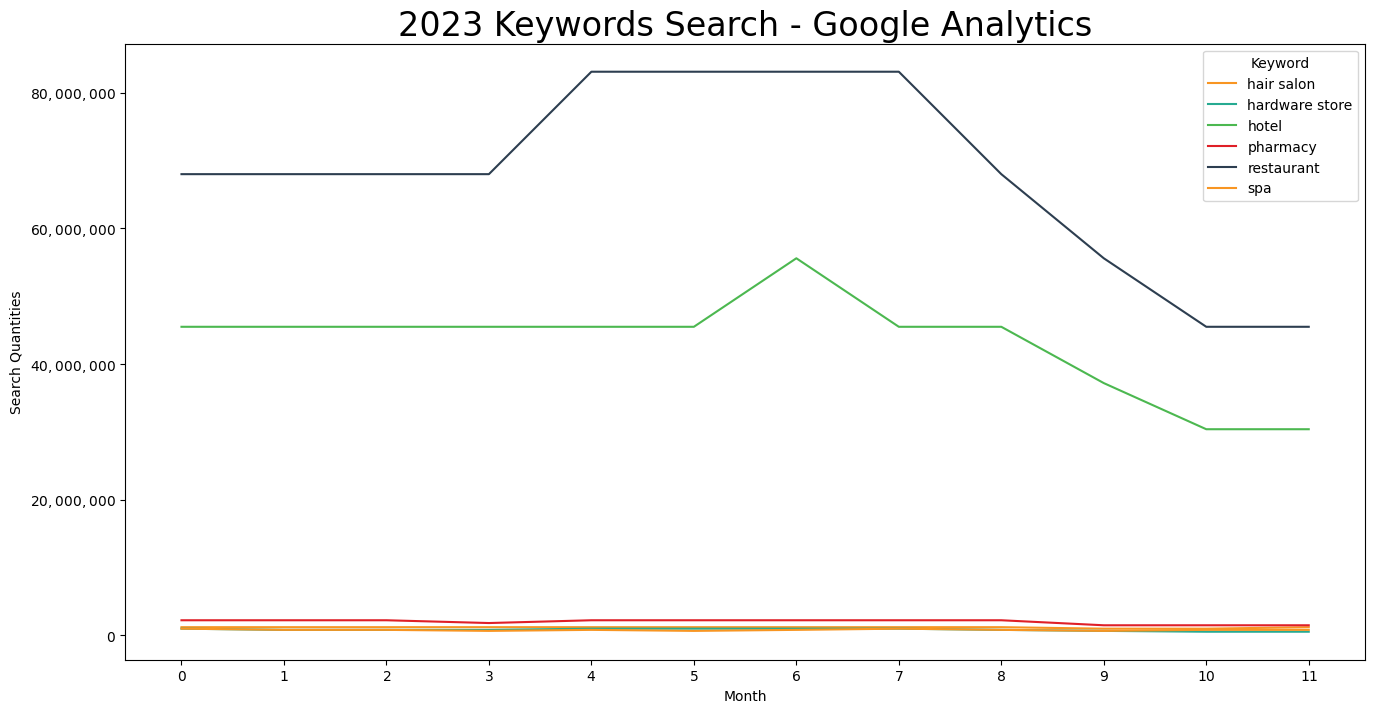

In [39]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_melted,x='Month',y='Value',hue='Keyword',palette=color_palette)

plt.title(f'2023 Keywords Search - Google Analytics', fontsize=24)
plt.ylabel('Search Quantities')
plt.xlabel('Month')
formatter = ScalarFormatter(useMathText=True, useOffset=False, useLocale=True)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

From this graph we can define the scope to be 'restaurants' as it clearly outruns the other business types.

Also, a key insight is that the search pattern has a seasonality on April until July.